In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


In [4]:
data = pd.read_csv("cell2cell_cleaned.csv")

In [5]:
data['TotalCallsInOut'] = data['PeakCallsInOut'] + data['OffPeakCallsInOut']
selected = ['CurrentEquipmentDays','RetentionCalls','TotalCallsInOut', 'PercChangeMinutes', 'MonthsInService', 'OverageMinutes', 'CustomerCareCalls', 'MonthlyRevenue','TotalRecurringCharge','MonthlyMinutes', 'CreditRating','MadeCallToRetentionTeam', 'HandsetWebCapable', 'NewCellphoneUser', 'HasCreditCard', 'HandsetRefurbished']
df_selected = data[selected].copy()






In [6]:
df = data[selected +['Churn']]
df.head()

,CurrentEquipmentDays,RetentionCalls,TotalCallsInOut,PercChangeMinutes,MonthsInService,OverageMinutes,CustomerCareCalls,MonthlyRevenue,TotalRecurringCharge,MonthlyMinutes,CreditRating,MadeCallToRetentionTeam,HandsetWebCapable,NewCellphoneUser,HasCreditCard,HandsetRefurbished,Churn
0,361.0,1,82.0,-157.0,61,0.0,0.0,24.00,22.0,219.0,1,1,1,0,1,0,1
1,1504.0,0,6.0,-4.0,58,0.0,0.0,16.99,17.0,10.0,4,0,0,1,1,0,1
2,1812.0,0,5.0,-2.0,60,0.0,0.0,38.00,38.0,8.0,3,0,0,1,1,0,0
3,458.0,0,859.4,157.0,59,0.0,4.3,82.28,75.0,1312.0,4,0,1,1,1,0,0
4,852.0,0,0.0,0.0,53,0.0,0.0,17.14,17.0,0.0,1,0,0,0,1,0,1


# Function for Evaluation

In [7]:
def evaluate_model(y_true, y_pred):

    #print out confusion matrix
    f, axes = plt.subplots(1, 1, figsize=(6, 4))
    sb.heatmap(confusion_matrix(y_true, y_pred), 
              annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.show()

In [8]:
def ROC_AUC_Curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Data Splitting

In [9]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)
threshold = 0.3

In [10]:

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

# Regression Model

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/minghanqing/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_log_train_proba = logreg.predict_proba(X_train)[:, 1]
y_log_test_proba = logreg.predict_proba(X_test)[:, 1]

Goodness of Fit of Logistic Regression Model: 	Train Dataset
Classification Accuracy 	: 0.7123413541606846
Train FPR: 0.48372560852947094
Train FNR: 0.40838431451208507


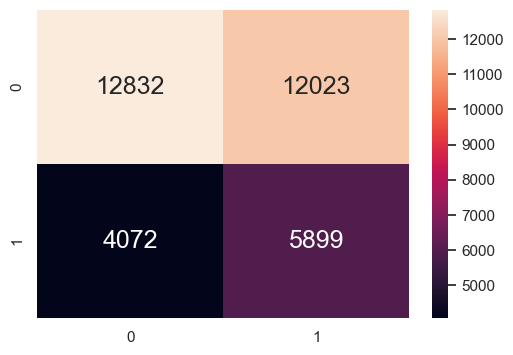

In [13]:
y_log_train_pred = (y_log_train_proba > threshold).astype(int)
cm_train = confusion_matrix(y_train, y_log_train_pred)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)



print("Goodness of Fit of Logistic Regression Model: \tTrain Dataset")
print("Classification Accuracy \t:",logreg.score(X_train,y_train))
print("Train FPR:", FPR_train)
print("Train FNR:", FNR_train)
evaluate_model(y_train, y_log_train_pred)
print()

Goodness of Fit of Logistic Regression Model: 	Test Dataset
Classification Accuracy 	: 0.7125150743668766
Test FPR: 0.4873263236950807
Test FNR: 0.4155357978474497


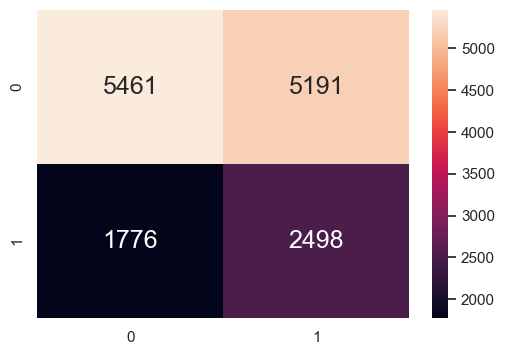

In [14]:
y_log_test_pred = (y_log_test_proba > threshold).astype(int)
cm_test = confusion_matrix(y_test, y_log_test_pred)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)


print("Goodness of Fit of Logistic Regression Model: \tTest Dataset")
print("Classification Accuracy \t:",logreg.score(X_test,y_test))
print("Test FPR:", FPR_test)
print("Test FNR:", FNR_test)
evaluate_model(y_test, y_log_test_pred)
print()

## Feature Importance (Logistic Regression):

In [15]:
logreg_model = pipeline.named_steps['logisticregression']

feature_names = X_train.columns
log_coefficients = logreg_model.coef_[0]

# Combine feature names and coefficients into a DataFrame for easier sorting
log_coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_coefficients})

# Sort the coefficients in descending order
log_coefficients_df_sorted = log_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted coefficients
print(log_coefficients_df_sorted)

                    Feature  Coefficient
0      CurrentEquipmentDays     0.249023
7            MonthlyRevenue     0.133736
11  MadeCallToRetentionTeam     0.119772
15       HandsetRefurbished     0.099749
5            OverageMinutes     0.023664
1            RetentionCalls     0.005898
2           TotalCallsInOut    -0.000450
13         NewCellphoneUser    -0.025414
6         CustomerCareCalls    -0.047359
12        HandsetWebCapable    -0.052540
14            HasCreditCard    -0.065034
9            MonthlyMinutes    -0.068464
3         PercChangeMinutes    -0.079203
10             CreditRating    -0.096769
8      TotalRecurringCharge    -0.109873
4           MonthsInService    -0.137693


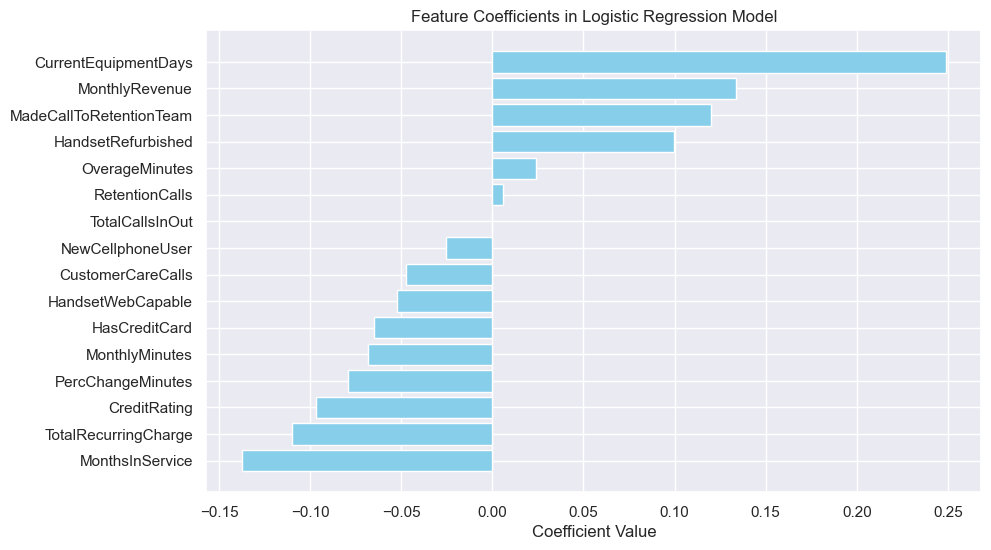

In [16]:


# Plotting the coefficients
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(log_coefficients_df_sorted['Feature'], log_coefficients_df_sorted['Coefficient'], color='skyblue')  # Create a horizontal bar chart
plt.xlabel('Coefficient Value')  # Label the x-axis
plt.title('Feature Coefficients in Logistic Regression Model')  # Set the title
plt.gca().invert_yaxis()  # Invert the y-axis to have the largest coefficient on top
plt.show()  # Show the plot

### Analysis:

- From the results, CurrentEquipmentDays, MonthlyRevenue, MonthsInService, MadeCallToRetentionTeam seems to be the more important attributes that impacts Churn. Below are the more prominent features and the possible reason why it might be the case:

#### 1. **Positive Coefficient**

- **CurrentEquipmentDays**: This feature has the most positive coefficient, indicating that customers who have had their equipment for a longer time may be more likely to churn, possibly indicating dissatisfaction or a lack of need for the service.

- **MonthlyRevenue**: Higher monthly revenue may suggest that customers might have higher expectations regarding the quality of service, customer support, or additional perks. If these expectations are not met, they may be more inclined to churn.

- **MadeCallsToRetentionTeam**: Customers who have had interactions with the retention team may already be considering leaving, making them more likely to churn.



#### 2. **Negative Coefficients**

- **MonthsInService**: This feature has the most negative coefficient, indicating that as the number of months a customer has been with the service increases, the likelihood of churn decreases. Long-term customers are less likely to leave, which could reflect customer loyalty or satisfaction over time.



# Decision Tree

In [17]:
X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

max_depth = 5
min_samples_split = 4
min_samples_leaf = 5

# Create a DecisionTreeClassifier with your specified parameters
dectree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# Fit the model on the training data
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4)

In [18]:
y_dec_train_proba = dectree.predict_proba(X_train)[:, 1]
y_dec_test_proba = dectree.predict_proba(X_test)[:, 1]

Classification Accuracy: 0.7188307586286108
Train FPR: 0.34085697042848523
Train FNR: 0.4635442784073814


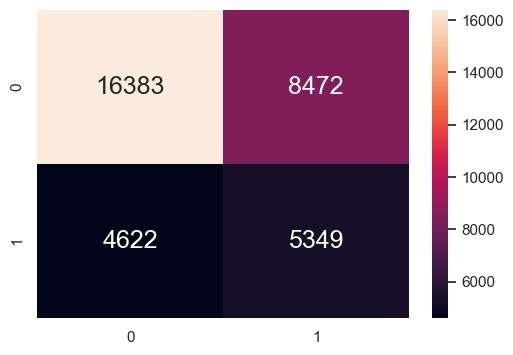

In [19]:
y_dec_train_pred = (y_dec_train_proba > threshold).astype(int)
cm_train = confusion_matrix(y_train, y_dec_train_pred)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)


print("Classification Accuracy:",dectree.score(X_train,y_train))
print("Train FPR:", FPR_train)
print("Train FNR:", FNR_train)
evaluate_model(y_train, y_dec_train_pred)
print()

Classification Accuracy: 0.7173388717673858
Test FPR: 0.3498873450995118
Test FNR: 0.4620963968179691


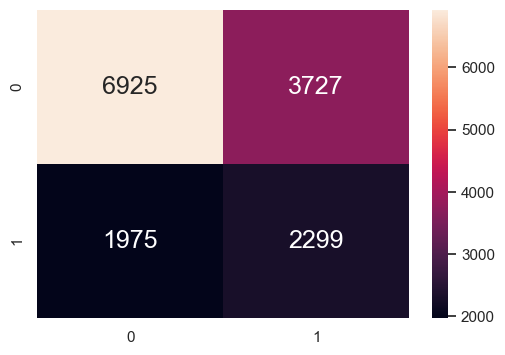

In [20]:
y_dec_test_pred = (y_dec_test_proba > threshold).astype(int)
cm_test = confusion_matrix(y_test, y_dec_test_pred)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)


print("Classification Accuracy:",dectree.score(X_test,y_test))
print("Test FPR:", FPR_test)
print("Test FNR:", FNR_test)
evaluate_model(y_test, y_dec_test_pred)
print()

## Feature Importance (Decision Tree):

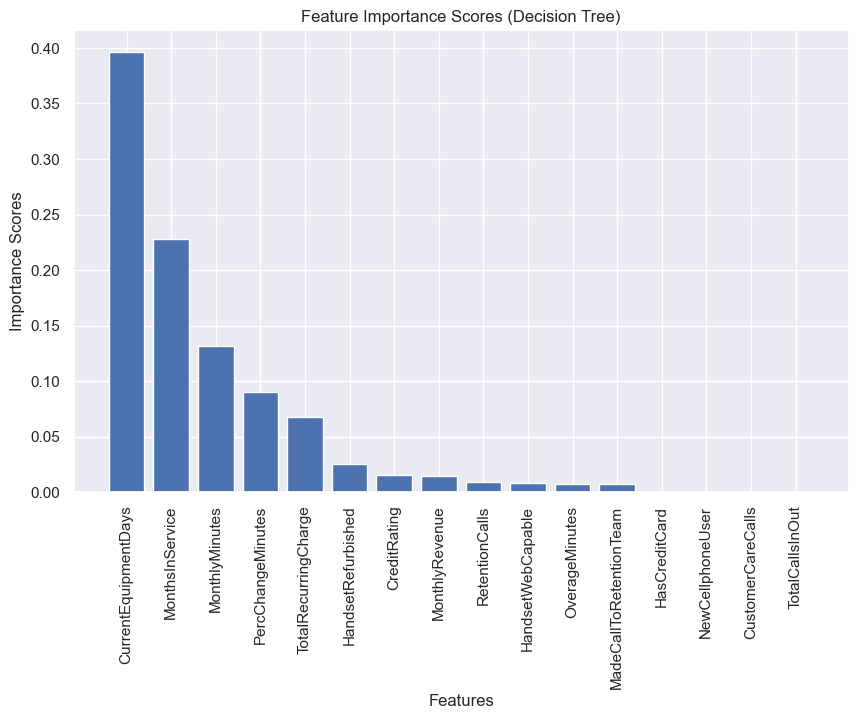

In [21]:
dec_feature_importances = dectree.feature_importances_

# Sort feature importance scores and corresponding feature names
dec_sorted_indices = dec_feature_importances.argsort()[::-1]
dec_sorted_feature_importances = dec_feature_importances[dec_sorted_indices]
dec_sorted_feature_names = [X.columns[i] for i in dec_sorted_indices]

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(dec_sorted_feature_importances)), dec_sorted_feature_importances, tick_label=dec_sorted_feature_names)
plt.title('Feature Importance Scores (Decision Tree)')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()

In [22]:
for feature, importance in zip(dec_sorted_feature_names, dec_sorted_feature_importances):
    print(f"Feature: {feature}, Importance Score: {importance}")

Feature: CurrentEquipmentDays, Importance Score: 0.39625084757423223
Feature: MonthsInService, Importance Score: 0.2276826503437521
Feature: MonthlyMinutes, Importance Score: 0.1313358600918284
Feature: PercChangeMinutes, Importance Score: 0.09003742632032126
Feature: TotalRecurringCharge, Importance Score: 0.0675414313276589
Feature: HandsetRefurbished, Importance Score: 0.024913259869929497
Feature: CreditRating, Importance Score: 0.015676515828280113
Feature: MonthlyRevenue, Importance Score: 0.014761103485975122
Feature: RetentionCalls, Importance Score: 0.008687937096501617
Feature: HandsetWebCapable, Importance Score: 0.008434317110686556
Feature: OverageMinutes, Importance Score: 0.007465479331475504
Feature: MadeCallToRetentionTeam, Importance Score: 0.007213171619358784
Feature: HasCreditCard, Importance Score: 0.0
Feature: NewCellphoneUser, Importance Score: 0.0
Feature: CustomerCareCalls, Importance Score: 0.0
Feature: TotalCallsInOut, Importance Score: 0.0


### Analysis:

- From the results, CurrentEquipmentDays, MonthsInService, MonthlyMinutes seems to be frequently used to make decisions at the internal nodes of the tree and how much it reduces impurities which indicates that they might be the more important attributes that impacts Churn.

1. **Possible Justification**:

- **CurrentEquipmentDays**: This feature has the highest importance score, which implies that the number of days a customer has their current equipment is the most significant predictor of churn according to the decision tree model. It suggests that the longer or shorter a customer has had their equipment could influence their decision to stay with or leave the service.

- **MonthsInService**: Following 'CurrentEquipmentDays', this feature is the swecond highest, indicating that the duration of the customer's relationship with the company is also a critical factor. Both long-term and new customers may have different reasons for churn, which this feature can help to highlight.

- **MonthlyMinutes**: Lastly, the third on the list is this feature which suggests that the amount of time customers spend using the service monthly is a strong indicator of churn risk. High or low usage could both be signals; perhaps high usage might lead to higher bills or network issues, while low usage might indicate a lack of engagement or need for the service.

# Random Forest

Train Accuracy 0.7427496697869408
Train FPR: 0.3334942667471334
Train FNR: 0.25373583391836324


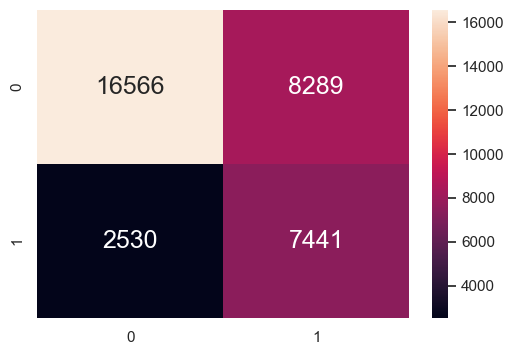

Test Accuracy: 0.7206217338871768
Test FPR: 0.3933533608711979
Test FNR: 0.3710809546092653


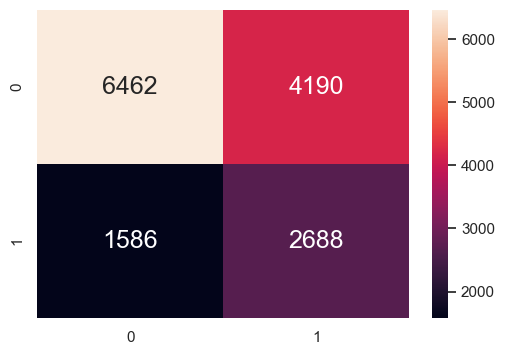

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    stratify=y
)

rf_classifier = RandomForestClassifier(n_estimators=150,  
                                       max_depth=11,       
                                       min_samples_split=4,  
                                       min_samples_leaf=5,   
                                       random_state=42)



rf_classifier.fit(X_train, y_train)  

y_RF_train_proba = rf_classifier.predict_proba(X_train)[:, 1]

y_RF_test_proba = rf_classifier.predict_proba(X_test)[:, 1]


threshold = 0.3
y_RF_train_pred = (y_RF_train_proba > threshold).astype(int)
y_RF_test_pred = (y_RF_test_proba > threshold).astype(int)


cm_train = confusion_matrix(y_train, y_RF_train_pred)
cm_test = confusion_matrix(y_test, y_RF_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# Train:
FPR_train = FP_train / (FP_train + TN_train)
FNR_train = FN_train / (FN_train + TP_train)
print("Train Accuracy", rf_classifier.score(X_train, y_train))
print("Train FPR:", FPR_train)
print("Train FNR:", FNR_train)
evaluate_model(y_train, y_RF_train_pred)


#Test:
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
FPR_test = FP_test / (FP_test + TN_test)
FNR_test = FN_test / (FN_test + TP_test)
print("Test Accuracy:", rf_classifier.score(X_test, y_test))
print("Test FPR:", FPR_test)
print("Test FNR:", FNR_test)
evaluate_model(y_test, y_RF_test_pred)


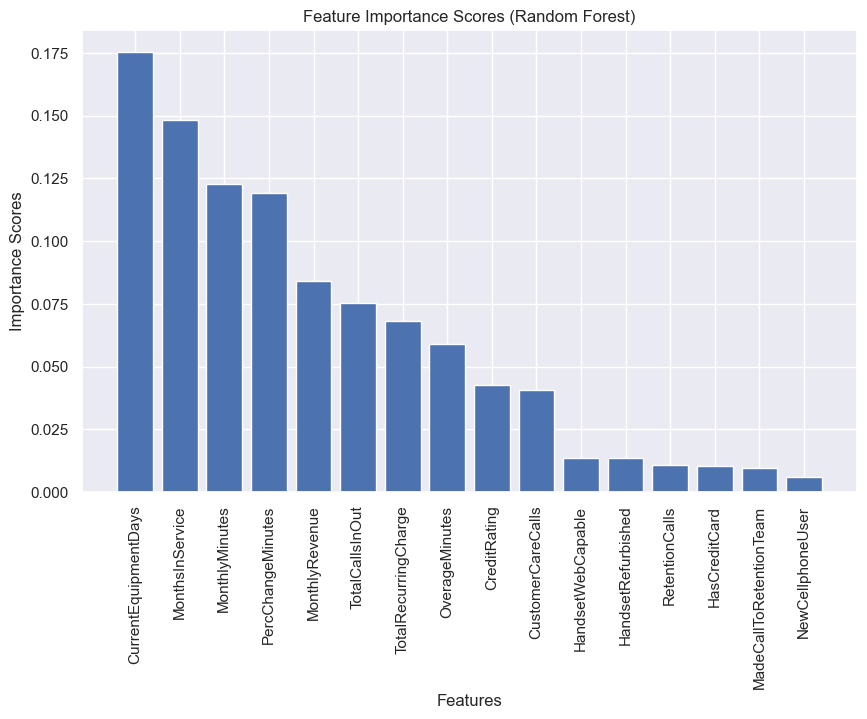

In [24]:
rf_feature_importances = rf_classifier.feature_importances_

# Sort feature importance scores and corresponding feature names
rf_sorted_indices = rf_feature_importances.argsort()[::-1]
rf_sorted_feature_importances = rf_feature_importances[rf_sorted_indices]
rf_sorted_feature_names = [X.columns[i] for i in rf_sorted_indices]

# Plot feature importance scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_sorted_feature_importances)), rf_sorted_feature_importances, tick_label=rf_sorted_feature_names)
plt.title('Feature Importance Scores (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()



In [25]:
for feature, importance in zip(rf_sorted_feature_names, rf_sorted_feature_importances):
    print(f"Feature: {feature}, Importance Score: {importance}")

Feature: CurrentEquipmentDays, Importance Score: 0.17530211408708887
Feature: MonthsInService, Importance Score: 0.14839705685868573
Feature: MonthlyMinutes, Importance Score: 0.12257730431333319
Feature: PercChangeMinutes, Importance Score: 0.11902063724314725
Feature: MonthlyRevenue, Importance Score: 0.08409482266193563
Feature: TotalCallsInOut, Importance Score: 0.07554583928337744
Feature: TotalRecurringCharge, Importance Score: 0.06813249812179153
Feature: OverageMinutes, Importance Score: 0.05910227545528108
Feature: CreditRating, Importance Score: 0.042818838668728286
Feature: CustomerCareCalls, Importance Score: 0.040620173649367194
Feature: HandsetWebCapable, Importance Score: 0.013699084994147785
Feature: HandsetRefurbished, Importance Score: 0.013634196549571537
Feature: RetentionCalls, Importance Score: 0.010720899209742759
Feature: HasCreditCard, Importance Score: 0.010510866222503487
Feature: MadeCallToRetentionTeam, Importance Score: 0.009703773199838218
Feature: NewCel

### Analysis:
- From the results, CurrentEquipmentDays, MonthsInService, MonthlyMinutes seems to be more important in reducing impurity and making accurate predictions across the ensemble of trees which can indicate that they might be the more important attributes that affects churn, supporting the results from the previous model.

### Conclusion

- ### Definitions:

#### False Positive Rate (FPR) - The proportion of instances where the model incorrectly predicts churn when the customer does not actually churn. This can lead to unnecessary retention efforts and resource allocation, increasing operational costs and potentially frustrating customers who are wrongly targeted for retention strategies.

#### False Negative Rate (FNR) - The instances where the model fails to predict churn for customers who do actually churn. This poses a significant risk for telecom companies, as they may lose valuable customers without prior warning, missing out on opportunities for targeted retention efforts and revenue preservation.



The high False Positive Rate (FPR) and False Negative Rate (FNR) indicate that while the model does identify the importance of features, it may not be doing so in a way that accurately reflects their true impact on churn. Their impact may not be as great and only with these data, we may not be able to improve the model further. This shortcoming could stem from several factor:

- Lack of Competitor Actionsb Data: Dataset not accounting for competitor actions leaves a blind spot in understanding churn. Customers might be influenced by competitive offers and marketing campaigns. Without this data, the model might overestimate the importance of internal factors while neglecting external pressures that cause churn.

- Lack of Considerations for Psychological Factor: Customer behavior and satisfaction are complex phenomena influenced by a multitude of subjective factors. The lack of direct measures for customer satisfaction, such as survey results or detailed feedback, can result in an incomplete picture of what truly drives churn. If the model relies solely on indirect indicators, such as the frequency of retention calls or usage patterns, it may misinterpret the significance of these features.

- Data Imbalance: The imbalance in the dataset between the customers who churn and those who do not also caused issues as this could have skewed the importance scores. The model might be biased towards the majority class, affecting the reliability of the feature importance scores.


However, the attributes identified by our model can still offer valuable insights. While the factors outlined may not represent the definitive drivers of churn, they serve as a good starting point for telecom companies to understand potential churn drivers within the scope of available information. With that, we will conclude our project.

Thank you!!!